In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

For Atari, where observations have large spatial resolution, the rep- resentation function starts with a sequence of convolutions with stride 2 to reduce the spatial resolution. Specifically, starting with an input observation of resolution 96 × 96 and 128 planes (32 history frames of 3 colour channels each, concatenated with the corresponding 32 actions broadcast to planes), we downsample as follows: 1 convolu- tion with stride 2 and 128 output planes, output resolution 48 × 48; 2 residual blocks with 128 planes; 1 convolution with stride 2 and 256 output planes, output resolution 24 × 24; 3 residual blocks with 256 planes; average pooling with stride 2, output resolution 12 × 12; 3 residual blocks with 256 planes; average pooling with stride 2, output resolution 6 × 6. The kernel size is 3 × 3 for all operations.

conv -> 2 residula -> conv -> 3 residual -> avgPooling -> 3 residual -> avgPooling.

In [321]:
_drift = np.array([0.3, 0]).T
_beta = np.array([0.05, 0.05]).T
_deltaT = 0.1
_theta = np.array([.1, .15]).T

In [322]:
initX = np.array([0.5, 0]).T

In [323]:
def step(curStep, drift, beta, theta, deltaT):
    nextStep = drift + math.exp(-beta * deltaT) * (curStep - drift) + np.random.normal(0, theta*math.sqrt((1 - math.exp(-2*beta*deltaT)) / (2 * beta)))
    return nextStep

In [324]:
historyX = []
time = 5
timeTable = [deltaT * i for i in range(int(time/deltaT)+1)]

In [325]:
historyX.append(initX.copy())
X = initX
for t in range(int(time/deltaT)):
    x_1, x_2 = X[0], X[1]
    # x_1_t, x_2_t = step(x_1, mu[0], theta, sigma, deltaT), step(x_2, mu[1], theta, sigma*2, deltaT)
    x_1_t = step(x_1, _drift[0], _beta[0], _theta[0], _deltaT)
    x_2_t = step(x_2, _drift[1], _beta[1], _theta[1], _deltaT)
    X_t = np.array([x_1_t, x_2_t]).T
    historyX.append(X_t.copy())
    X = X_t


In [326]:
historyX = np.array(historyX)

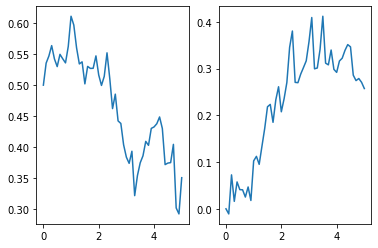

In [327]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(timeTable, historyX[:, 0])

ax2 = plt.subplot(1, 2, 2)
plt.plot(timeTable, historyX[:, 1])

In [328]:
import random

In [333]:
random.random()

0.3773834266809709